In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import re
import numpy as np

import torch

In [2]:
def load_events(events_file="../data/wlnu.dat", n_events=100_000):
    
    # construct regular expression
    
    vecs_reg_exp = ""
    for l in ("W", "L", "NU"):
        vecs_reg_exp += fr"{l:<4}(.+) (.+) (.+) (.+)\n" 
        
    reg_exp = r"EVENT .+\nGEN \n"
    reg_exp += vecs_reg_exp
    reg_exp += r"RECO\n"
    reg_exp += r"MET (.+) (.+)\n"
    reg_exp += vecs_reg_exp
    
    # load file
    
    text = ""
    with open("../data/wlnu.dat") as f:
        text = f.read()
        
    # create dataframes
    
    vec_names = []
    for l in ("W", "L", "Nu"):
        vec_names += [f"{l}_{c}" for c in ("px", "py", "pz", "m")]

    gen_df = pd.DataFrame(columns=vec_names) 
    reco_df = pd.DataFrame(columns=["MET_x", "MET_y"] + vec_names)
    
    # fill dataframes
    
    start = 0
    
    for event in tqdm(range(n_events)):
        
        # Data format:
        # lines[i] = EVENT N
        # lines[i+1] = GEN
        # lines[i+2] = W %f %f %f %f
        # lines[i+3] = L %f %f %f %f
        # lines[i+4] = NU %f %f %f %f
        # lines[i+5] = RECO
        # lines[i+6] = MET %f %f
        # lines[i+7] = W %f %f %f %f
        # lines[i+8] = L %f %f %f %f
        # lines[i+9] = NU %f %f %f %f
        # lines[i+10] = EVENT N+1
        
        # find start and end of event text
        
        end = start
        # find 10th next newline
        for _ in range(10):
            end += 1
            while text[end] != "\n":
                end += 1
        end += 1
        
        # extract values from text
        
        event_text = text[start:end]
        values = re.findall(reg_exp, event_text)[0]
            
        
        # fill gen_df
        
        gen_df.loc[len(gen_df)] = 0
        gen_row = gen_df.loc[len(gen_df) - 1]
        
        for i in range(len(gen_row)):
            gen_row[i] = float(values[i])
            
        used = len(gen_row)
            
        # fill reco_df
        reco_df.loc[len(reco_df)] = 0
        reco_row = reco_df.loc[len(reco_df) - 1]
        
        for i in range(len(reco_row)):
            reco_row[i] = float(values[used + i])
    
        # update start
    
        start = end
        
    return gen_df, reco_df

In [4]:
gen_df, reco_df = load_events(n_events=100_000)
display(gen_df)
display(reco_df)

  0%|          | 0/100000 [00:00<?, ?it/s]

,W_px,W_py,W_pz,W_E,L_px,L_py,L_pz,L_E,Nu_px,Nu_py,Nu_pz,Nu_E
0,-46.760670,41.011800,-43.85589,79.19306,6.665028,41.530350,-2.259977,-0.000000,-53.425700,-0.518545,-41.595910,0.000000
1,-6.443056,9.282914,53.33664,79.85141,-16.143060,-23.715470,55.236140,-0.000001,9.699999,32.998380,-1.899506,-0.000000
2,58.453440,48.353020,-18.46302,80.45028,40.762100,64.186340,8.116494,0.000001,17.691340,-15.833320,-26.579520,0.000001
3,-34.926010,34.547720,44.26195,81.50707,-33.708560,-20.902200,19.969680,-0.000001,-1.217451,55.449920,24.292260,-0.000001
4,60.630400,7.549021,-63.20350,77.63614,6.582341,-29.098750,-5.918424,0.000001,54.048060,36.647770,-57.285080,-0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-46.471350,-37.120540,61.94522,79.81639,-9.844193,25.298100,18.010840,0.000000,-36.627150,-62.418640,43.934380,0.000000
99996,-1.718449,5.498686,45.76823,80.14969,-16.599050,39.591210,27.982240,-0.000001,14.880600,-34.092520,17.785990,-0.000000
99997,23.201790,11.388460,31.85340,81.36174,52.768890,5.488154,10.270450,-0.000001,-29.567100,5.900311,21.582950,0.000000
99998,1.553033,-6.876898,-66.00791,79.60041,-6.706760,33.673190,-46.750920,-0.000001,8.259793,-40.550080,-19.256980,0.000000


,MET_x,MET_y,W_px,W_py,W_pz,W_E,L_px,L_py,L_pz,L_E,Nu_px,Nu_py,Nu_pz,Nu_E
0,-53.425700,-0.518545,-46.760670,41.011800,-5.130671,72.45556,6.665028,41.530350,-2.259977,-0.000000,-53.425700,-0.518545,-2.870695,-0.000001
1,9.699999,32.998380,-6.443056,9.282914,121.458900,62.06258,-16.143060,-23.715470,55.236140,0.000001,9.699999,32.998380,66.222720,0.000000
2,17.691340,-15.833320,58.453440,48.353020,10.650840,64.81327,40.762100,64.186340,8.116494,0.000001,17.691340,-15.833320,2.534346,-0.000001
3,-1.217451,55.449920,-34.926010,34.547720,47.894420,81.45966,-33.708560,-20.902200,19.969680,-0.000001,-1.217451,55.449920,27.924740,0.000001
4,54.048060,36.647770,60.630400,7.549021,-18.872810,72.92236,6.582341,-29.098750,-5.918424,-0.000000,54.048060,36.647770,-12.954380,-0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-36.627150,-62.418640,-46.471350,-37.120540,66.028040,79.78848,-9.844193,25.298100,18.010840,-0.000001,-36.627150,-62.418640,48.017200,0.000001
99996,14.880600,-34.092520,-1.718449,5.498686,52.228610,79.92127,-16.599050,39.591210,27.982240,-0.000001,14.880600,-34.092520,24.246370,0.000001
99997,-29.567100,5.900311,23.201790,11.388460,16.107090,79.08740,52.768890,5.488154,10.270450,-0.000001,-29.567100,5.900311,5.836648,0.000000
99998,8.259793,-40.550080,1.553033,-6.876898,-103.098800,75.38843,-6.706760,33.673190,-46.750920,-0.000001,8.259793,-40.550080,-56.347910,-0.000001


In [9]:
gen_df.to_csv("../wlnu/data/gen.csv", index=False)
reco_df.to_csv("../wlnu/data/reco.csv", index=False)

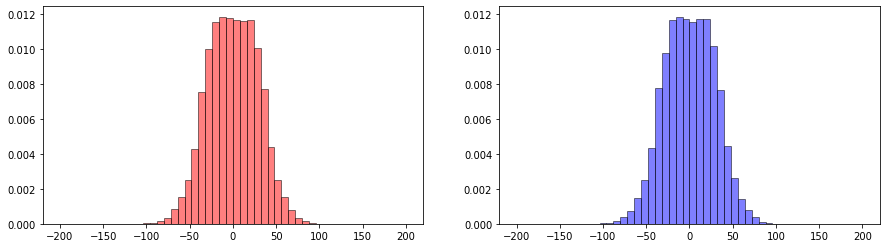

In [22]:
plt.rcParams["figure.figsize"] = [15, 4]

plt.subplot(1, 2, 1)
plt.hist(reco_df["MET_x"], bins=50, range=[-200, 200], density=True, alpha=0.5, edgecolor='black',
         label="MET_x", color="red")
plt.subplot(1, 2, 2)
plt.hist(reco_df["MET_y"], bins=50, range=[-200, 200], density=True, alpha=0.5, edgecolor='black',
         label="MET_y", color="blue")

# reset default
plt.rcParams["figure.figsize"] = [6.4, 4.8]

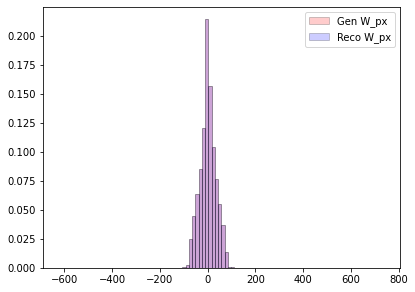

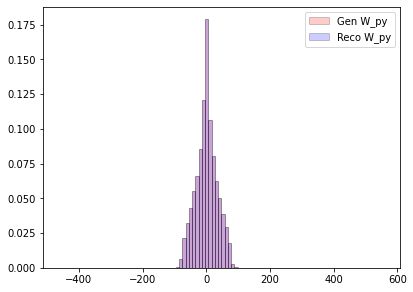

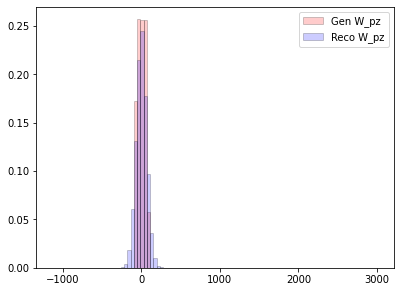

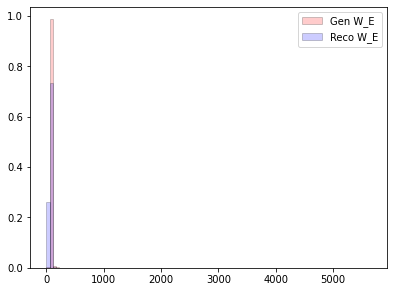

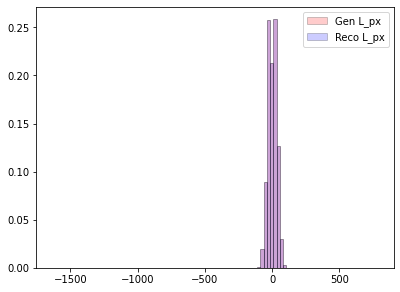

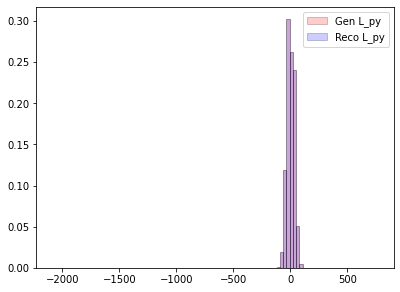

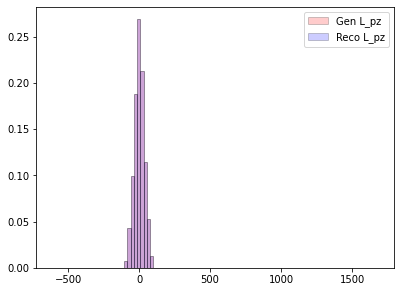

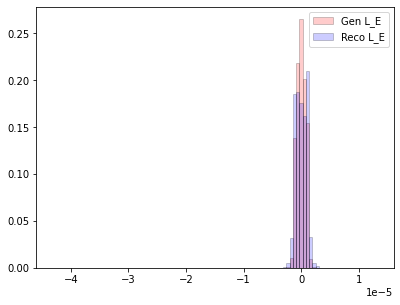

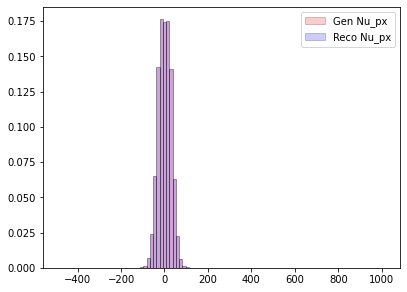

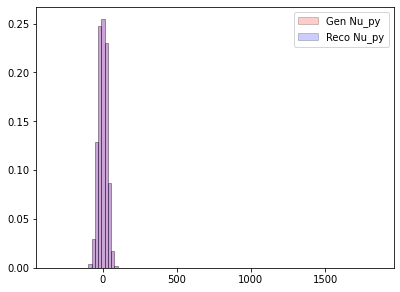

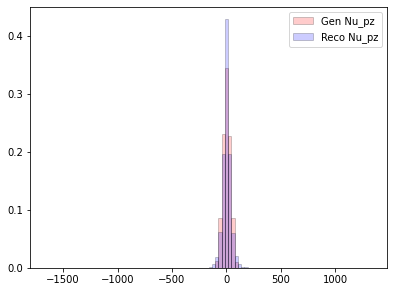

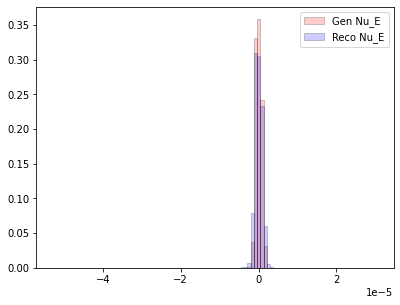

In [46]:
def norm_weights(arr):
    return np.ones_like(arr)/float(len(arr))

for (gen_col, reco_col) in zip(gen_df, reco_df.columns[2:]):
    plt.figure()
    
    bins=np.histogram(np.hstack((gen_df[gen_col], reco_df[reco_col])), bins=100)[1]
    
    kwargs = {
        "bins": bins,
        "alpha": 0.2,
        "edgecolor": "black"
    }
    
    plt.hist(gen_df[gen_col], label=f"Gen {gen_col}", color="red", weights=norm_weights(gen_df[gen_col]), **kwargs)
    plt.hist(reco_df[reco_col], label=f"Reco {reco_col}", color="blue", weights=norm_weights(reco_df[reco_col]), **kwargs)
    plt.legend()